# Week 1: Dataset cleaning and other things to check (Video part 21)

Goal:
- Dataset cleaning
  - Constant features
  - Duplicated features
- Other things to check
  - Duplicated rows
  - Check if dataset is shuffled



#### Duplicated and constant features
- The competition data is only a part of the data that organizers have. They could give us a fraction of objects they have or a fraction of features.
- We might have features with the same value for each row for both train and test set. This could be due to the sampling procedure, for example the feature is year and the organizer only give us 1 year data. We should remove such constant features.
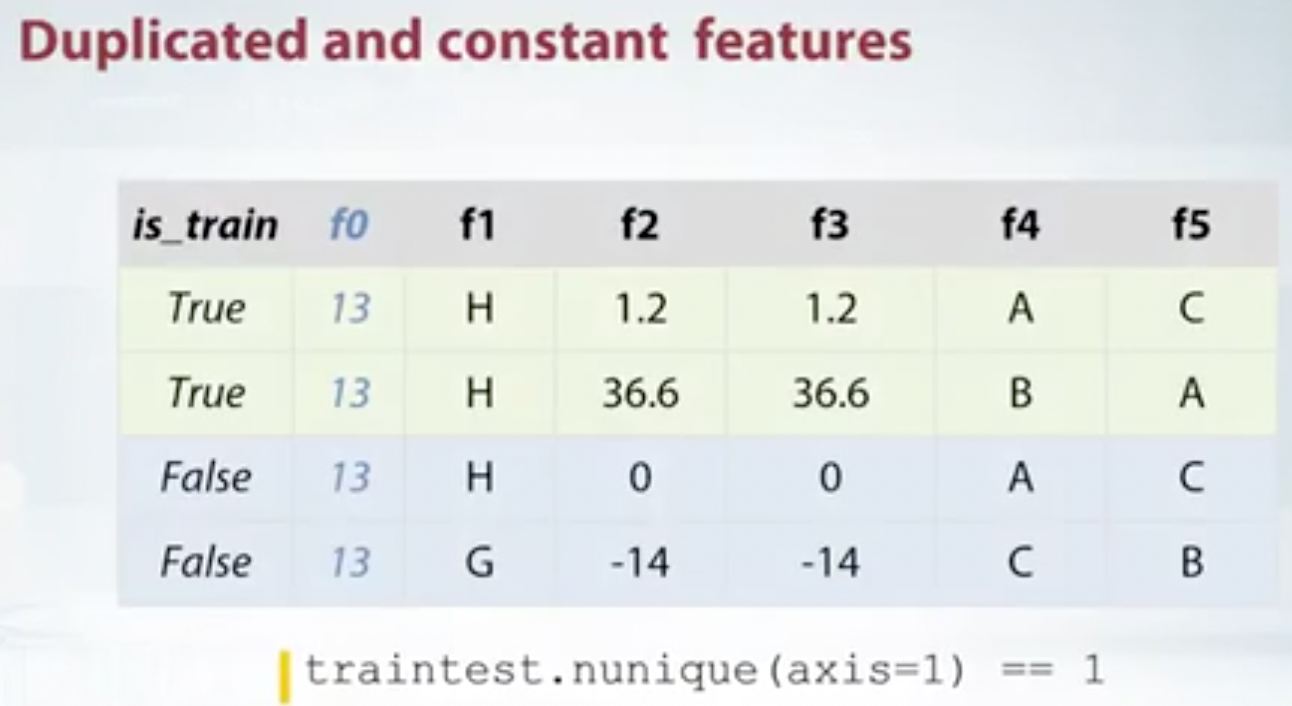
- It is also possible that we have features that is constant on the train set but has different values in the test set. Again, it is better to remove such features completely since it is constant during training.
- Example 2: if we have features that have values that are present only in the test set, we need to decide if the new value matters a lot.
  - In the example it is the `f1` feature here, it is constant in the train set but has different value in the test set.
  - It is better to remove such features completely since it is constant during training.
  - Problem here: linear model will assign some weight to this feature and so it will be a part of the prediction formula, but this formula will be completely unreliable for instances with new unseen values (eg here in the test set - the last 2 rows)
  - In generatl, even if a categorical feature is not constant on the train set but there are values that are only present in the test set - we need to handle this situation properly.
  - One workaround for above situation is to evaluate the prediction quality when model is trained using data with unseen values; and without unseen values.
  - We can then decide whether (1) to remove the feature or (2) split data on the feature and train separate models.
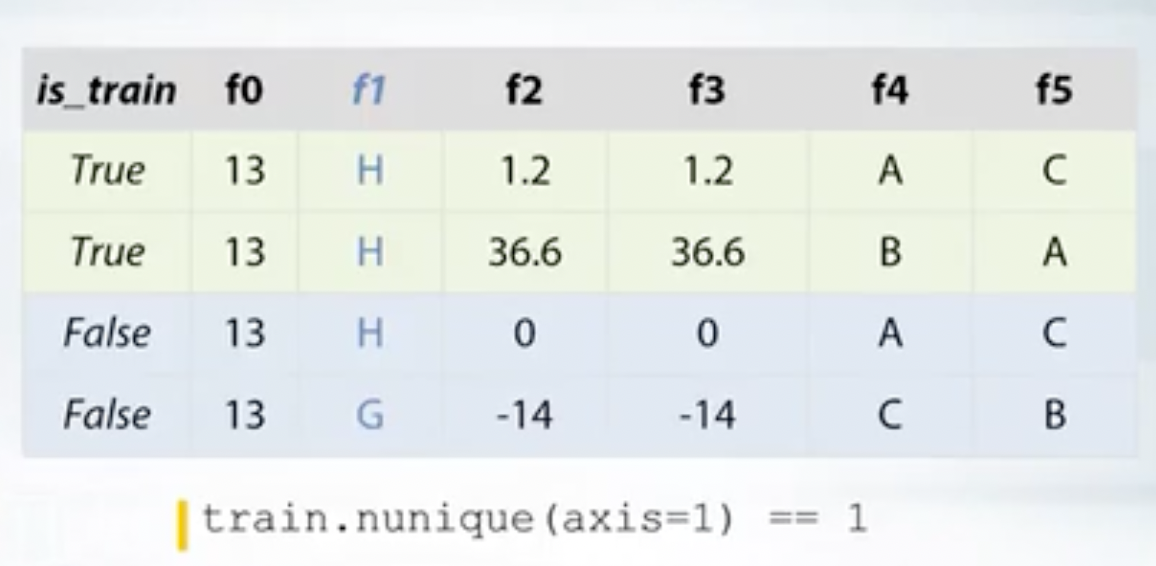


- Example 3: duplicated features - obviously we should remove one of them
 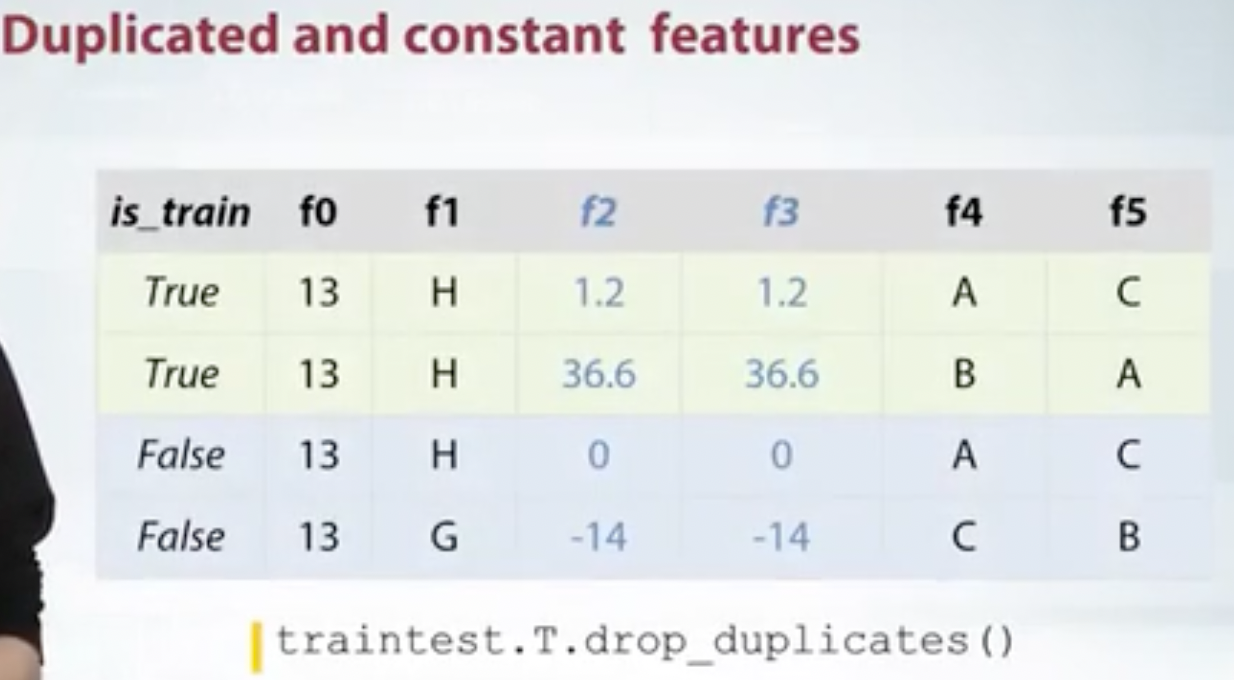

- Example 4: duplicated categorical features but they may not be encoded using the same category name
  - The most important thing here is to correctly encode them. e need to encode the features from top to bottom so that the first unique feature we see gets label 1, the second label 2 and so on.
  - If after such encoding, both of the columns turns out to be identical (eg here column f4, f5), so we can remove one of them.
  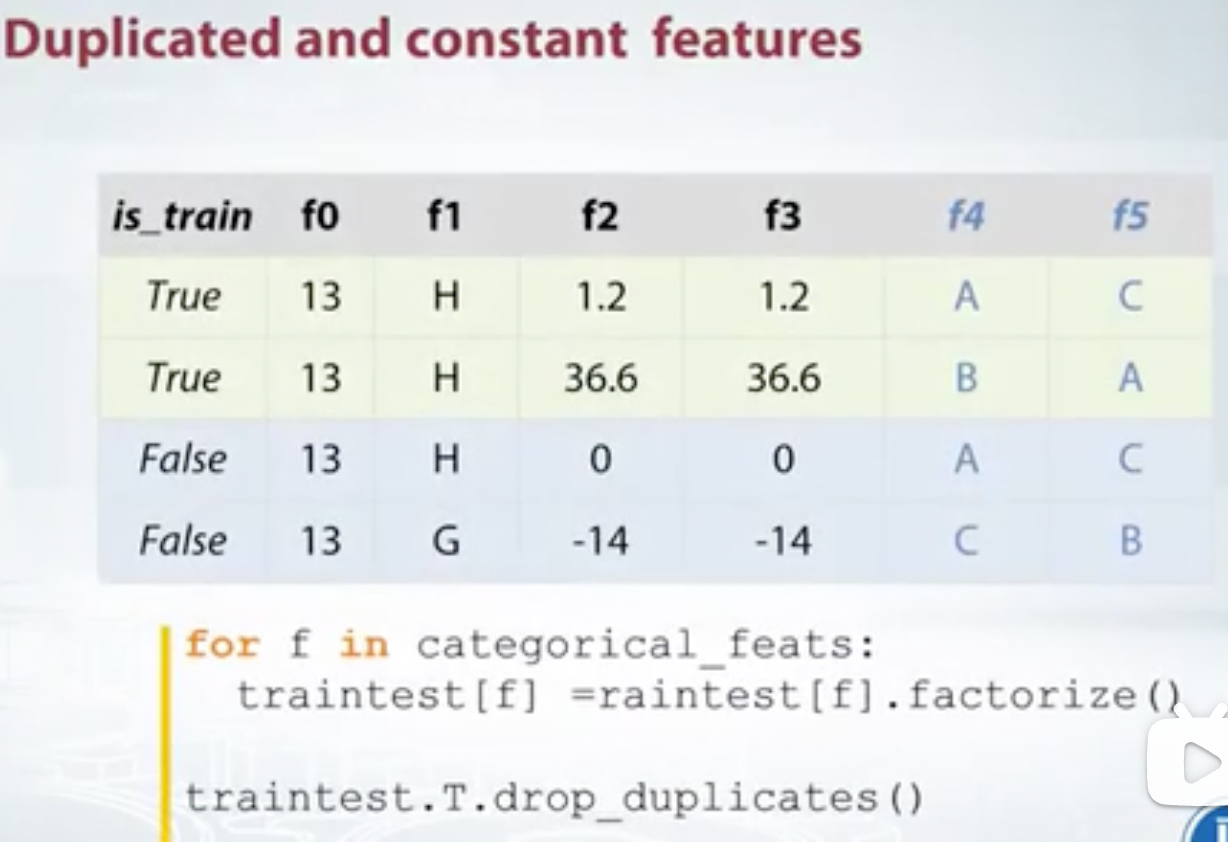

- Example 5: duplicated rows in train and test set
  - If there are duplicated rows that also have different target, our prediction can be just random.
  - These duplicated rows can be the result of a mistake.
  - We need to ask ourselves why we observe such duplicated rows, it may tell us something about the data generation process.
  - We may need to delete these duplicated rows.
  - Another thing we can do is we can set label manually to identify rows in train set that are present in the test set.
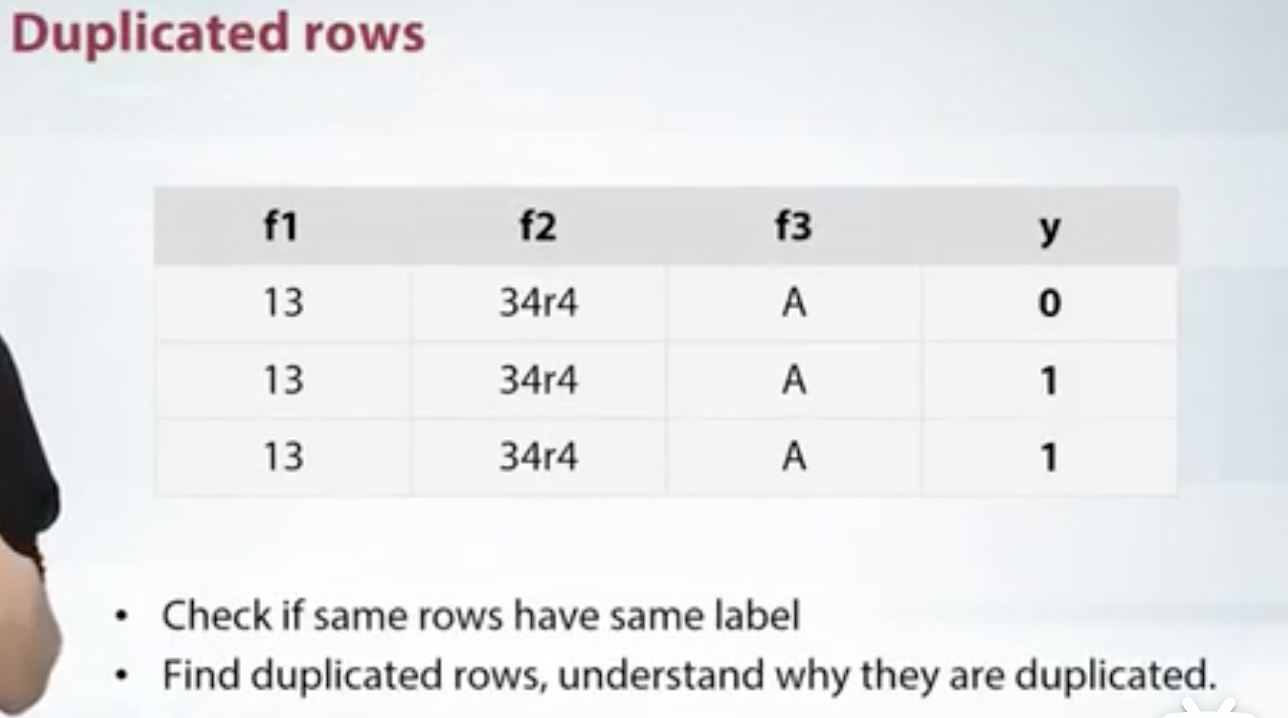

- Example 6: check if dataset is shuffled
  - If data is not shuffled, then there is high possiblity of data leakage
  - To check that data is shuffled, we can plot the fature or target values against row index.
  - We can optionally smooth the values using running average.
  - If the data is shuffled properly, we can expect some kind of oscillation of the target values around the mean target value (here shown in blue dotted line). In this case here, it looks like the end of the train set is much different to the start and we have some patterns. 
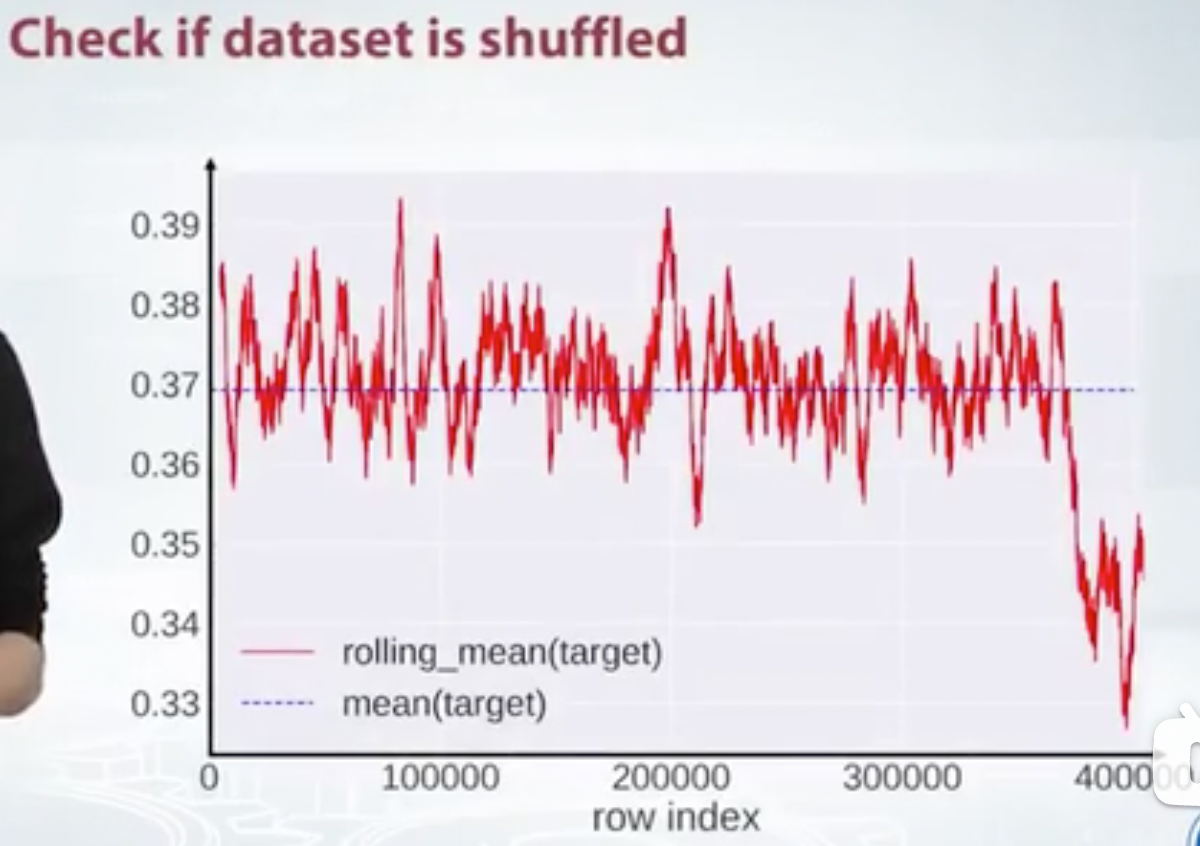

- We need to visualize every thing in our dataset.
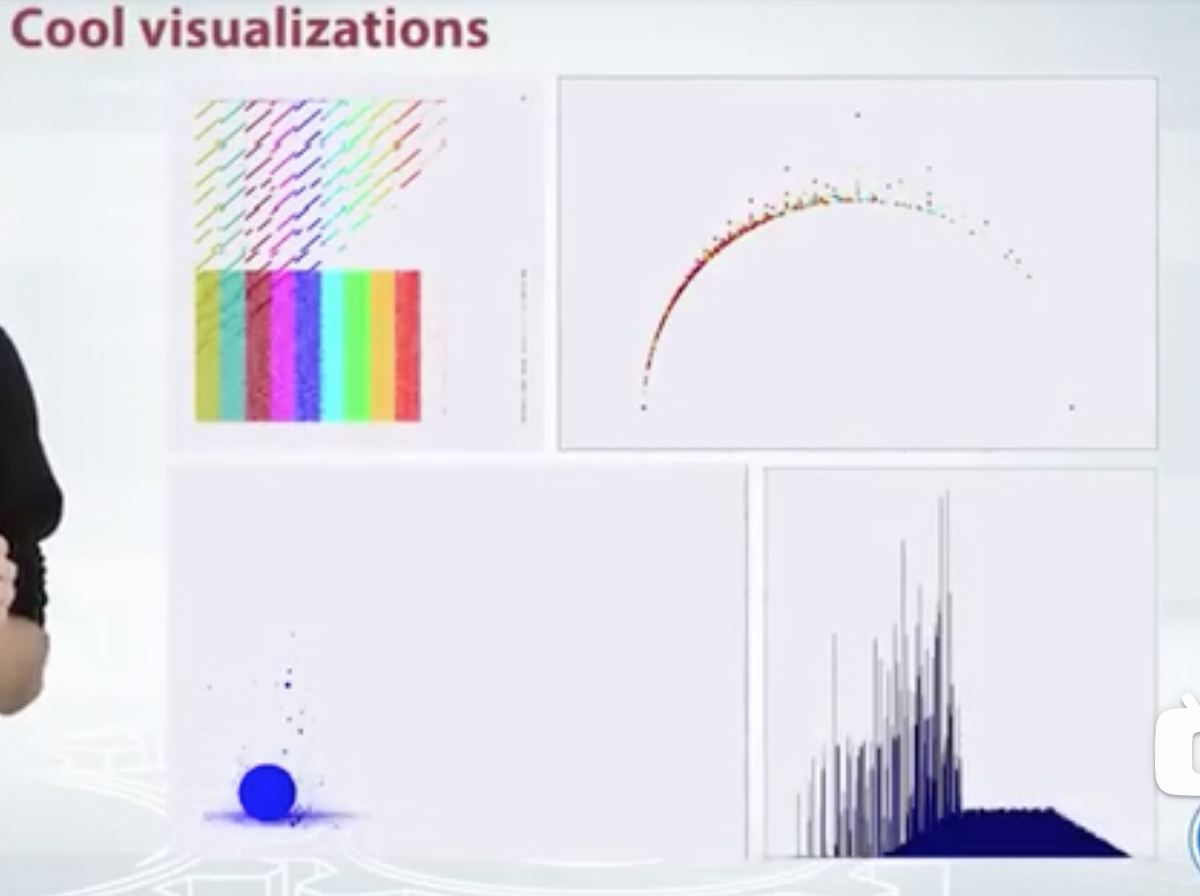

# Summary
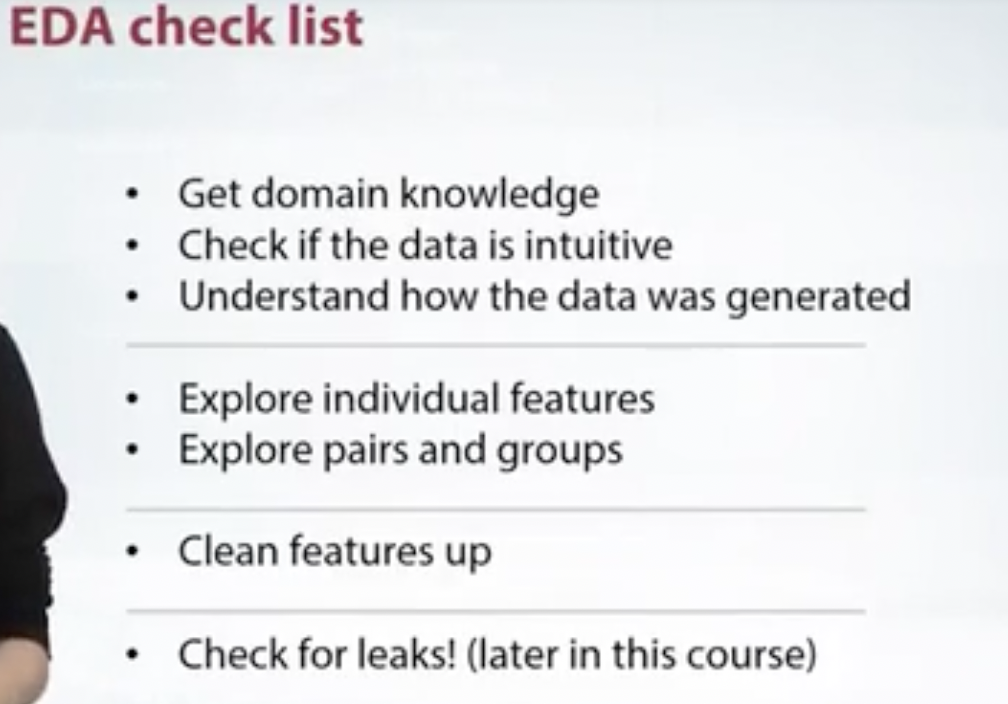

# Things I've learnt:
- If we have unseen feature values in test set, we can either (1) to remove the feature or (2) split data on the feature and train separate models if the feature with unseen value is important. We can decide by evaluating trained model on dataset with and without unseen values.
- Categorical features can be duplicated but not obvious if they are encoded using different categorical names. See above code on how to encode them and drop duplicates. Also maybe plotting their feature values against row index will be more obvious.
- If data is not shuffled, then there is high possiblity of data leakage. To check that data is shuffled, we can plot the feature values against row index. Also plot the mean feature value. If they are properly shuffled, then we can see they oscillate around this mean value. Otherwise, we'll see some pattern.